<a href="https://colab.research.google.com/github/yaqianhe/GIA/blob/main/Exercise9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exercise 9
In this exercie, you will plot the population for Arkansas in 2010. You will need to use Arkansas boundary to clip the temperature data over entire United States.

(1) Download the AR boundary data from the link: http://gis.arkansas.gov/

(2) Download the US temperature data from the link: https://www.cpc.ncep.noaa.gov/products/GIS/GIS_DATA/

(3) Reproject the data

(4) Clip the temperature data for Arkansas

(5) Plot the Arkansas temperature

In [ ]:
# This is the example code for your reference. You need to generate your own script.

# Import packages
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from shapely.geometry import Point
from shapely.geometry import box
import seaborn as sns
!apt install libspatialindex-dev
!pip install rtree
!pip install geopandas #rtree and libspatialindex-dev must be installed before geopandas, otherwise errors will be shown up
import geopandas as gpd
!pip install earthpy
import earthpy as et
!pip install mapclassify
import pandas as pd

# Adjust font size and style of all plots in notebook with seaborn
sns.set(font_scale=1.5, style="whitegrid")

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libspatialindex-c4v5 libspatialindex4v5
The following NEW packages will be installed:
  libspatialindex-c4v5 libspatialindex-dev libspatialindex4v5
0 upgraded, 3 newly installed, 0 to remove and 15 not upgraded.
Need to get 555 kB of archives.
After this operation, 3,308 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex4v5 amd64 1.8.5-5 [219 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex-c4v5 amd64 1.8.5-5 [51.7 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex-dev amd64 1.8.5-5 [285 kB]
Fetched 555 kB in 1s (418 kB/s)
Selecting previously unselected package libspatialindex4v5:amd64.
(Reading database ... 145480 files and directories currently installed.)
Preparing to unpack .../libspatialindex4v5_1.8.5-5_

In [ ]:
# read the data
# as I built the script in Colab, I need to mount my google drive
# You do not need to do this step, as you use the Anaconda Jupyter Notebook
from google.colab import drive
drive.mount('/content/drive/')

# !!!Change the path for your data
ar_path='/content/drive/My Drive/Colab Notebooks/ar/COUNTIES_AHTD.shp'
temp_path='/content/drive/My Drive/Colab Notebooks/temp_20080614/t.full.1stday_month_20080614.shp'

# Import shapefile using geopandas
ar_boundary = gpd.read_file(ar_path)
temp_us = gpd.read_file(temp_path)

# View the Coordinate Reference System of both layers 
print(ar_boundary.crs)
print(temp_us.crs)

Mounted at /content/drive/
epsg:26915
epsg:4035


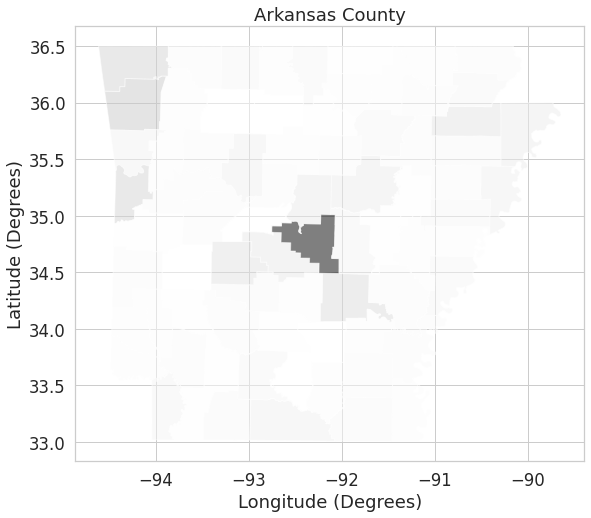

In [ ]:
# The data do not have same projection, so needs to reproject it. Here I reproject AR boundary to the temperature's.
# Reproject the ar_boundary to match the temp_us layer
ar_boundary_rpj  = ar_boundary.to_crs(epsg=4035)

# Plot AR boundary
fig, ax = plt.subplots(figsize=(12, 8))

ar_boundary_rpj.plot(cmap='Greys', 
                     column='Pop_1990',
                     ax=ax, alpha=.5)

ax.set(title="Arkansas County",
             xlabel="Longitude (Degrees)", ylabel="Latitude (Degrees)");

In [ ]:
# Check the geometry of AR boundary
ar_boundary_rpj.head()

,ID,District,mapid,mslink,Pop_1990,Pop_2000,Sq_Mi_Land,ID1,County_Nam,county_num,FHWA_Numbe,Land_Densi,Sq_Mi_Tota,Sq_Mi_Wate,Pop_2010,SHAPE_area,SHAPE_len,geometry
0,2.0,2.0,24.0,4311.0,85487.0,84278.0,884.82,2.0,Jefferson,35.0,69.0,96.62,913.70,28.88,77435.0,2.370994e+09,284256.349610,"POLYGON ((-92.20798 34.49287, -92.19047 34.492..."
1,3.0,4.0,24.0,4288.0,113409.0,157715.0,945.43,3.0,Washington,72.0,143.0,119.35,951.72,6.29,203065.0,2.465024e+09,227692.739748,"POLYGON ((-93.88772 36.23507, -93.89337 36.220..."
2,4.0,4.0,24.0,4290.0,42493.0,53247.0,595.39,4.0,Crawford,17.0,33.0,71.36,604.20,8.81,61948.0,1.565526e+09,218076.568569,"POLYGON ((-94.49314 35.75925, -94.47976 35.759..."
3,5.0,9.0,24.0,4289.0,11618.0,14243.0,836.81,5.0,Madison,44.0,87.0,13.88,837.06,0.25,15717.0,2.166601e+09,215220.142258,"POLYGON ((-93.81507 36.30648, -93.79706 36.306..."
4,6.0,4.0,24.0,4291.0,14897.0,17771.0,609.55,6.0,Franklin,24.0,47.0,24.44,619.69,10.13,18125.0,1.604367e+09,221024.220904,"POLYGON ((-93.87413 35.77352, -93.85626 35.773..."


In [ ]:
# Dissolve AR state to get the AR boundary
ar_state_boundary = ar_boundary_rpj[['mapid','Pop_1990', 'geometry']] # !!!Change to Pop_2010
ar_state = ar_state_boundary.dissolve(by='mapid') # dissolve based on mapid

# View the resulting geodataframe
ar_state

,geometry,Pop_1990
mapid,,
24.0,"POLYGON ((-91.23097 33.56141, -91.23098 33.561...",85487.0


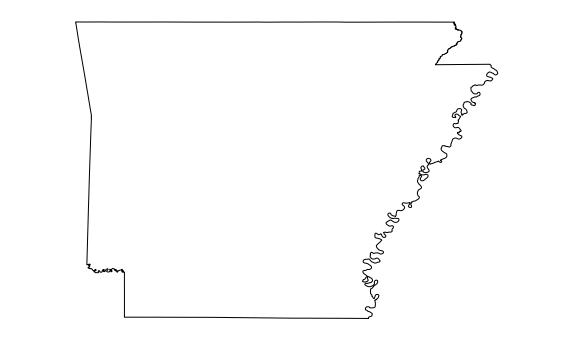

In [ ]:
# Plot the dissolved data
fig, ax = plt.subplots(figsize=(10, 6))
ar_state.reset_index().plot(ax=ax,
                            color="white",
                            edgecolor="black");
ax.set_axis_off()
plt.axis('equal')
plt.show() 

In [ ]:
# Check the geometry of Temperature data
temp_us.head()

,Date,Contour,Title,Unit,Resolution,geometry
0,20080614,0,Mean Daily Temperature - From the 1st day of m...,Celcius,1x1,"POLYGON ((-129.00000 21.00000, -129.00000 52.0..."
1,20080614,4,Mean Daily Temperature - From the 1st day of m...,Celcius,1x1,"POLYGON ((-83.85848 21.00000, -84.00000 21.141..."
2,20080614,8,Mean Daily Temperature - From the 1st day of m...,Celcius,1x1,"POLYGON ((-83.71696 21.00000, -84.00000 21.283..."
3,20080614,12,Mean Daily Temperature - From the 1st day of m...,Celcius,1x1,"POLYGON ((-83.57545 21.00000, -84.00000 21.425..."
4,20080614,16,Mean Daily Temperature - From the 1st day of m...,Celcius,1x1,"POLYGON ((-83.43392 21.00000, -84.00000 21.567..."


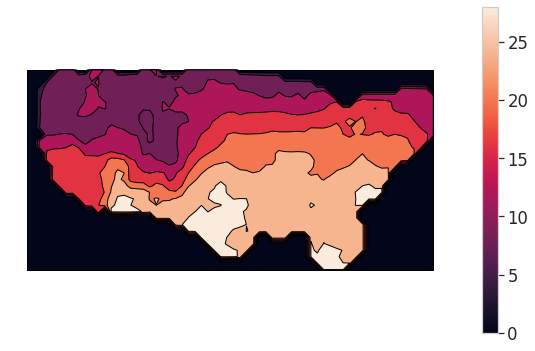

In [ ]:
# Plot Temperature data for United States
fig, ax = plt.subplots(figsize=(10, 6))
temp_us.plot(ax=ax,
            column='Contour',
            edgecolor="black",
             legend=True);
ax.set_axis_off()
plt.axis('equal')
plt.show()

In [ ]:
# Clip temperature for Arkansas
temp_ar = gpd.clip(temp_us, ar_state)
temp_ar.head()

,Date,Contour,Title,Unit,Resolution,geometry
0,20080614,0,Mean Daily Temperature - From the 1st day of m...,Celcius,1x1,"POLYGON ((-91.23097 33.56141, -91.23098 33.561..."
1,20080614,4,Mean Daily Temperature - From the 1st day of m...,Celcius,1x1,"POLYGON ((-91.23097 33.56141, -91.23098 33.561..."
2,20080614,8,Mean Daily Temperature - From the 1st day of m...,Celcius,1x1,"POLYGON ((-91.23097 33.56141, -91.23098 33.561..."
3,20080614,12,Mean Daily Temperature - From the 1st day of m...,Celcius,1x1,"POLYGON ((-91.23097 33.56141, -91.23098 33.561..."
4,20080614,16,Mean Daily Temperature - From the 1st day of m...,Celcius,1x1,"POLYGON ((-91.23097 33.56141, -91.23098 33.561..."


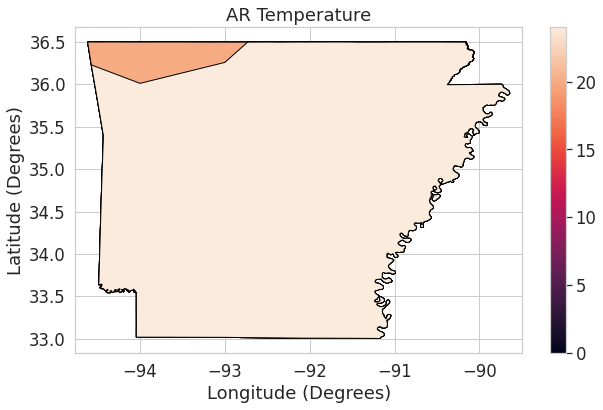

In [ ]:
# Plot AR Temperature
fig, ax = plt.subplots(figsize=(10, 6))
temp_ar.plot(ax=ax,
            column='Contour',
            edgecolor="black",
            legend=True);
#ax.set_axis_off()
ax.set(title="AR Temperature",
             xlabel="Longitude (Degrees)", ylabel="Latitude (Degrees)");
plt.axis('equal')
plt.show()